Lambda School Data Science

*Unit 4, Sprint 1, Module 3*

---

# Document Classification (Assignment)

This notebook is for you to practice skills during lecture.

Today's guided module project and assignment will be different. You already know how to do classification. You ready know how to extract features from documents. So? That means you're ready to combine and practice those skills in a kaggle competition. We we will open with a five minute sprint explaining the competition, and then give you 25 minutes to work. After those twenty five minutes are up, I will give a 5-minute demo an NLP technique that will help you with document classification (*and **maybe** the competition*).

Today's all about having fun and practicing your skills.

## Sections
* <a href="#p1">Part 1</a>: Text Feature Extraction & Classification Pipelines
* <a href="#p2">Part 2</a>: Latent Semantic Indexing
* <a href="#p3">Part 3</a>: Word Embeddings with Spacy
* <a href="#p4">Part 4</a>: Post Lecture Assignment

# Text Feature Extraction & Classification Pipelines (Learn)
<a id="p1"></a>

## Follow Along 

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model (try using the pipe method I just demoed)

### Load Competition Data

In [1]:
import pandas as pd

# You may need to change the path
train = pd.read_csv('./whiskey-reviews-dspt4/train.csv')
test = pd.read_csv('./whiskey-reviews-dspt4/test.csv')


print(train.shape, test.shape)

(4087, 3) (1022, 2)


In [2]:
train.head()

,id,description,ratingCategory
0,1321,"\nSometimes, when whisky is batched, a few lef...",1
1,3861,\nAn uncommon exclusive bottling of a 6 year o...,0
2,655,\nThis release is a port version of Amrut’s In...,1
3,555,\nThis 41 year old single cask was aged in a s...,1
4,1965,"\nQuite herbal on the nose, with aromas of dri...",1


In [3]:
train.loc[0, 'description']

'\nSometimes, when whisky is batched, a few leftover barrels are returned to the warehouse. Canadian Club recently pulled and vatted several of these from the 1970s. Acetone, Granny Smith apples, and fresh-cut white cedar showcase this long age. Complex and spicy, yet reserved, this dram is ripe with strawberries, canned pears, cloves, pepper, and faint flowers, then slightly pulling oak tannins. Distinct, elegant, and remarkably vibrant, this ancient Canadian Club is anything but tired. (Australia only)\xa0A$133'

In [4]:
# Distribution of ratingCategory: 0 (Excellent), 1 (Good), 2 (Poor)
train.ratingCategory.value_counts(normalize=True)

1    0.704918
0    0.279178
2    0.015904
Name: ratingCategory, dtype: float64

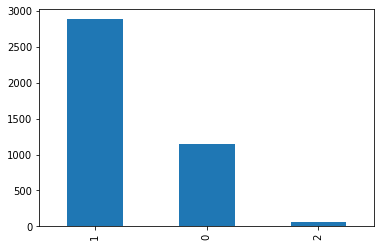

In [5]:
#plotting categories of rating
train['ratingCategory'].value_counts().plot(kind='bar')

In [6]:
# Read a few reviews from the "Excellent" category
pd.set_option('display.max_colwidth', 0)
train[train.ratingCategory == 0].sample(3)

,id,description,ratingCategory
1911,4707,"\nA very traditional Rosebank-aged in a refill hogshead and bottled fairly young (12 years old). Rosebank is one of the better, yet lesser known Lowland single malts. Since the distillery was closed down in 1993, it will continue being unfamiliar to most, and finding young Rosebanks like this one will become increasingly more difficult. Here’s one at cask strength. The whisky turns very cloudy with the addition of water due to lack of chill filtering, but the additional water brings out the whisky’s subtle aromas and flavors-fresh cut grass, hay, delicate fruit, and a gentle malty sweetness. Ironically, I actually enjoyed some of the recent young G&M Rosebanks bottled at 40% ABV better than this one-their flavors were cleaner, brighter, and more refined. Still, this is a fair representation of the Lowland style. \r\n",0
1109,4824,"\nA bourbon with a gentle demeanor and easy drinkability. The whisky is nicely balanced, with sweet notes of corn, caramel, and vanilla blending in nicely with subtle fruit and dried spice. An uncomplicated, fairly straight-forward bourbon for everyday drinking. I just wish there was more to it. \r\n",0
666,4984,"\nOdd aroma, more like a weedy, aromatic bark than honey; wonder what the bees were gathering from? Very sweet, on the rich and cloying side, but without the real honey character that makes Jack Daniel’s Honey the best of this bunch, and I can’t get over the aroma. The only saving grace is that even at 35%, the bourbon still manages to peek through; it’s not enough.",0


In [7]:
# Read a few reviews from the "Poor" category
train[train.ratingCategory == 2].sample(3)

,id,description,ratingCategory
1667,5081,"\nAged for “at least” one month, this bourbon is a collaboration with the band Fierce Dead Rabbit. Better Days is pale gold and noticeably cloudy. On the nose it’s paste, yeasty bread dough, and wet pavement. On the palate it is all over the place with raw oak, cinnamon, almond, and black pepper. There's no balance and no integration. The finish is short, hot, and dry. As whiskey ages, it goes through odd, awkward phases, and that's where this one is.",2
3892,5095,"\nClear, slight golden hue; as expected from a 7% straight whiskey/93% grain neutral spirit “spirit whiskey.” Faint nose of sweet caramel corn in a hot bloom of estery alcohol. Thickly sweet in the mouth, with barely a hint of whiskey, like a badly-made cocktail or an ill-conceived flavored vodka. While there are no glaring flaws in the make, this is simply a bad idea. Light whiskey failed once, in the 1970s, and for good reasons. Those reasons haven't changed.",2
303,5049,"\nIts age certainly shows, with a good dose of leather, tobacco, and barrel char. Sweet notes of caramel, toffee, and candied fruit try to rescue it, but ultimately fails toward the finish, leaving my mouth parched, leathery, and craving a glass of water (or a beer!). A bourbon with individuality, but it pains me to think what this could have been (or once was).",2


In [8]:
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

### Split the Training Set into Train/Validation

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train['description'], 
                                                    train['ratingCategory'], 
                                                    test_size=0.2, 
                                                    stratify=train['ratingCategory'],
                                                    random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(3269,) (818,) (3269,) (818,)


### Define Pipeline Components

In [10]:
# Build a Baseline TF-IDF Model
# Create Pipeline Components
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
rfc = RandomForestClassifier()
# vect = ...
# clf = ...

pipe = Pipeline([('vect', vect), ('clf', rfc)])

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [11]:
# parameters = {
#     'vect__max_df': (0.75, 1.0),
#     'clf__max_depth':(5,10,15,20)
# }

# grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=4, verbose=1)
# grid_search.fit(..., ...)


parameters = {
    'vect__max_df': (0.7, 1.0),
    'vect__min_df': (2, 5, 10),
    'vect__max_features': (5000, 10000),
    'clf__n_estimators': (100, 500),
    'clf__max_depth': (10, 20, None)
}

grid_search = GridSearchCV(pipe, parameters, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  6.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                        no

### Make a Submission File
*Note:* In a typical Kaggle competition, you are only allowed two submissions a day, so you only submit if you feel you cannot achieve higher test accuracy. For this competition the max daily submissions are capped at **20**. Submit for each demo and for your assignment. 

In [12]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [13]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [14]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [15]:
subNumber = 0

In [16]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./whiskey-reviews-dspt4/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

You're trying to achieve a minimum of 70% Accuracy on your model.

## Latent Semantic Indexing (Learn)
<a id="p2"></a>

## Follow Along
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
4. Make a submission to Kaggle 


### Define Pipeline Components

In [17]:
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import TruncatedSVD

# Use parameters from RandomSearch in previous section
vect = TfidfVectorizer(stop_words='english', 
                       ngram_range=(1,2),
                       min_df=2, 
                       max_df=0.7,
                       max_features=10000)

# Add dimensionality reduction
svd = TruncatedSVD(algorithm='randomized',
                   n_iter=10)

# Use parameters from RandomSearch in previous section
rfc = RandomForestClassifier(n_estimators=500, 
                             random_state=42)

In [18]:
params = {
    'svd__n_components': stats.randint(100, 500),
}

In [19]:
pipe = Pipeline([
    ('vect', vect),      # TF-IDF Vectorizer
    ('svd', svd),        # Truncated SVD Dimensionality Reduction
    ('clf', rfc)         # RandomForest Classifier
])

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [20]:
# parameters = {
#     'lsi__svd__n_components': [10,100,250],
#     'vect__max_df': (0.75, 1.0),
#     'clf__max_depth':(5,10,15,20)
# }

# grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=4, verbose=1)
# grid_search.fit(train.description, train.ratingCategory)
# # grid_search.fit(..., ...)

# Fit
random_search = RandomizedSearchCV(pipe, params, cv=2, n_iter=3, n_jobs=-1, verbose=1)
random_search.fit(X_train, y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   44.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   44.8s finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('vect',
                                              TfidfVectorizer(analyzer='word',
                                                              binary=False,
                                                              decode_error='strict',
                                                              dtype=<class 'numpy.float64'>,
                                                              encoding='utf-8',
                                                              input='content',
                                                              lowercase=True,
                                                              max_df=0.7,
                                                              max_features=10000,
                                                              min_df=2,
                                                       

In [21]:
random_search.best_score_


0.7096975958137289

In [22]:
random_search.best_params_

{'svd__n_components': 163}

### Make a Submission File

In [24]:
# Predictions on test sample
# pred = grid_search.predict(test['description'])
pred = random_search.predict(test['description'])


In [26]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [27]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [28]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./whiskey-reviews-dspt4/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

Continue to apply Latent Semantic Indexing (LSI) to various datasets. 

# Word Embeddings with Spacy (Learn)
<a id="p3"></a>

## Follow Along

In [31]:
# Apply to your Dataset
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint

param_dist = {
    'max_depth' : randint(3,10),
    'min_samples_leaf': randint(2,15)
}

In [30]:
# Continue Word Embedding Work Here
import spacy
nlp = spacy.load("en_core_web_lg")

In [32]:
train.shape

(4087, 3)

In [33]:
def get_word_vectors(docs):
    return [nlp(doc).vector for doc in docs]



In [42]:
# X = get_word_vectors(train['description'])

# len(X) == len(train['description'])


X_train_wv = get_word_vectors(X_train)
X_val_wv = get_word_vectors(X_val)
X_test_wv = get_word_vectors(test['description'])
print('train lengths match =',len(X_train_wv) == len(X_train) )
print('val lengths match =',len(X_val_wv) == len(X_val) )
print('test lengths match =',len(X_test_wv) == len(test['description']) )

train lengths match = True
val lengths match = True
test lengths match = True


In [43]:
train.shape
print(train.head())

     id  \
0  1321   
1  3861   
2  655    
3  555    
4  1965   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description  \
0  \nSometimes, when whisky is batched, a few leftover barrels are returned to the warehouse. Canadian Club recently pulled and vatted several of these from the 1970s. Acetone, Granny Smith apples, and fresh-cut white cedar showcase this long age. Complex and spicy, yet reserved, this dram is ripe with strawberries, canned pears, cloves, pepper, and faint flowers, then slightly pulling oak tannins. Distinct, 

In [44]:
# rfc.fit(X, train['ratingCategory'])


#  use the lists created in the train/val split 
rfc.fit(X_train_wv, y_train)  # train model on train X and y 


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [45]:
# rfc.score(X, train['ratingCategory'])


rfc.score(X_val_wv,y_val)   # score model on val X and y

0.7420537897310513

In [49]:
#  ANOTHER WAY to
#  Evaluate on test data

# ORIGINAL CODE 
# from sklearn.metrics import accuracy_score
# y_test_pred = rfc.predict(X_test)
# accuracy_score(y_val, y_test_pred)

from sklearn.metrics import accuracy_score
rfc_pred = rfc.predict(X_val_wv)
accuracy_score(y_val, rfc_pred)   # score model on val X and y


0.7420537897310513

In [51]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(16, 2),
                    random_state=1)

In [54]:
clf.fit(X_train_wv, y_train)

/Users/anitasharma/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [55]:
# # Evaluate on test data
# y_test = clf.predict(X_test)
# accuracy_score(X_test, y_test)



# Evaluate on test data
mlp_pred = clf.predict(X_val_wv)
accuracy_score(y_val, mlp_pred)


0.7530562347188264

### Make a Submission File

In [56]:
# Predictions on test sample
# pred = clf.predict(test['description'])

pred = clf.predict(X_test_wv)

In [57]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [58]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,0
4,2306,1


In [59]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model
submission.to_csv(f'./whiskey-reviews-dspt4/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
    - Try to extract word embeddings with Spacy and use those embeddings as your features for a classification model.
4. Make a submission to Kaggle 

# Post Lecture Assignment
<a id="p4"></a>

Your primary assignment this afternoon is to achieve a minimum of 70% accuracy on the Kaggle competition. Once you have achieved 70% accuracy, please work on the following: 

1. Research "Sentiment Analysis". Provide answers in markdown to the following questions: 
    - What is "Sentiment Analysis"? 
    - Is Document Classification different than "Sentiment Analysis"? Provide evidence for your response
    - How do create labeled sentiment data? Are those labels really sentiment?
    - What are common applications of sentiment analysis?
2. Research our why word embeddings worked better for the lecture notebook than on the whiskey competition.
    - This [text classification documentation](https://developers.google.com/machine-learning/guides/text-classification/step-2-5) from Google might be of interest
    - Neural Networks are becoming more popular for document classification. Why is that the case?